---
author:
- Dr. Valera
date: 2023-09-08
title: Data Structure - Fall 2023
---

# Time Complexity

In computer science and programming, analyzing the time complexity of
algorithms is crucial. It helps us understand how the algorithm's
performance scales with different input sizes. Time complexity is
typically expressed using Big O notation, which describes the upper
bound of an algorithm's running time in relation to its input size.

1.  **Upper Bound**: Big O notation describes the upper bound or
    worst-case scenario for the time complexity of an algorithm. It
    indicates the maximum amount of time an algorithm will take as a
    function of the input size.

2.  **Simplified Representation**: Big O notation simplifies the
    analysis of an algorithm's performance by focusing on the dominant
    factor that contributes most significantly to the running time as
    the input size grows. It ignores constant factors and lower-order
    terms.

3.  **Function of $n$**: The "f(n)" part in O(f(n)) represents a
    mathematical function that describes the upper bound of the
    algorithm's time complexity. This function is typically chosen to be
    the most significant term that affects the running time.

4.  **O(1)**: If an algorithm has constant time complexity, it is
    denoted as O(1). This means that the running time remains constant,
    regardless of the input size. It's the most efficient time
    complexity.

5.  **O($\log n$)**: Logarithmic time complexity, denoted as
    O($\log n$), indicates that the running time grows logarithmically
    with the input size. Algorithms with this complexity are very
    efficient and scale well.
    

In [1]:
    def binary_search(arr, target):
        left = 0
        right = len(arr) - 1

        while left <= right:
            mid = (left + right) // 2  # Calculate the middle index

            if arr[mid] == target:
                return mid  # Target found, return the index
            elif arr[mid] < target:
                left = mid + 1  # Search the right half
            else:
                right = mid - 1  # Search the left half

        return -1  # Target not found in the array

### Performing runtime tests on 26 arrays.

In [2]:
import time
N    = []
Time = []
for n in range(1,26):
    sorted_list = []
    # Creating the list of length n. The target is n+1
    for j in range(1,2**n+1):
        sorted_list.append(j)
    
    # Calculating the runtime
    start_time = time.time()  
    binary_search(sorted_list,2**n)
    end_time = time.time()
    elapsed_time = end_time - start_time
    
    # Updating the variable
    N.append(2**n)
    Time.append(elapsed_time)

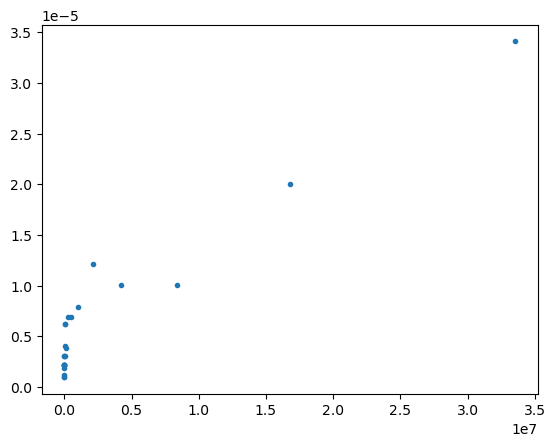

In [3]:
import matplotlib.pyplot as plt
plt.plot(N,Time,'.')

In [4]:
# Logarithm regression

import numpy as np
from sklearn.linear_model import LinearRegression
import math

logN = [math.log2(n) for n in N]
x    = np.array(logN).reshape((-1,1)) 
T    = np.array(Time)

model = LinearRegression().fit(x, T)

print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")



intercept: -3.392696380615237e-06
slope: [7.39280994e-07]


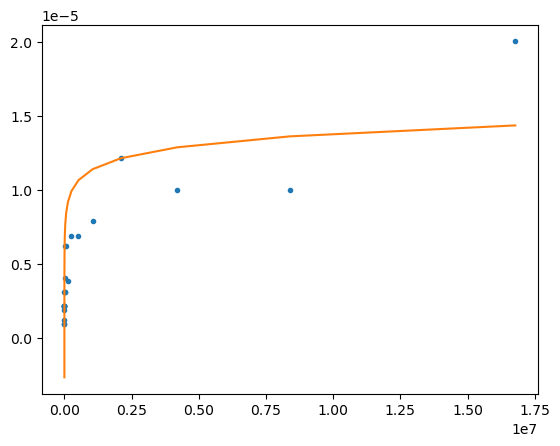

In [5]:
# Adjusting the Data a the logarithm regression
Rlog = [model.intercept_ + model.coef_*math.log2(n) for n in N]
plt.plot(N[:-1],Time[:-1],'.')
plt.plot(N[:-1],Rlog[:-1])

6.  **O($n$)**: Linear time complexity, denoted as O($n$), means that
    the running time grows linearly with the input size. As the input
    size doubles, the running time roughly doubles as well.
     

In [6]:
def linear_search(arr, target):
    
   for element in arr:
       if element == target:
           return element

### Performing runtime tests on 1000 arrays.

In [7]:
N    = []
Time = []
for n in range(1,1000):
    list = []
    # Creating the list of length n. The target is n+1
    for j in range(1,n+1):
        list.append(j)
    
    # Calculating the runtime
    start_time = time.time()  
    linear_search(list,n)
    end_time = time.time()
    elapsed_time = end_time - start_time
    
    # Updating the variable
    N.append(n)
    Time.append(elapsed_time)

In [8]:
x    = np.array(N).reshape((-1,1)) 
T    = np.array(Time)

model = LinearRegression().fit(x, T)

print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")

intercept: -7.830238704623355e-07
slope: [1.47065152e-08]


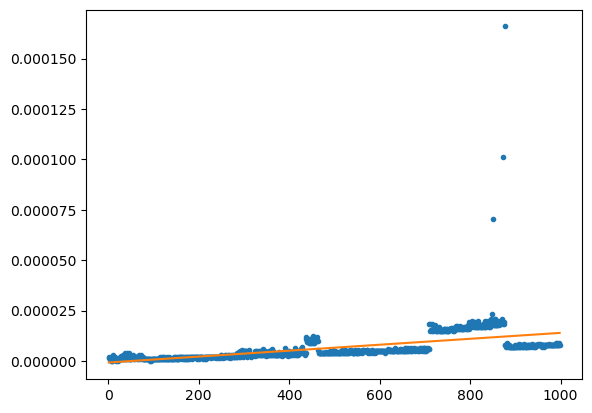

In [9]:
# Adjusting the Data a the logarithm regression
Rlin = [model.intercept_ + model.coef_*n for n in N]
plt.plot(N[:-1],Time[:-1],'.')
plt.plot(N[:-1],Rlin[:-1])

7.  **O($n^2$)**, **O($n^3$)**, etc.: Polynomial time complexities, such
    as O($n^2$) or O($n^3$), indicate that the running time grows with a
    polynomial function of the input size. These are less efficient than
    linear or logarithmic complexities.

8.  **O($2^n$)**: Exponential time complexity, denoted as O($2^n$),
    implies that the running time doubles with each increase in the
    input size. Algorithms with exponential complexity are usually very
    inefficient for large inputs.

9.  **Comparative Analysis**: Big O notation allows for the comparison
    of different algorithms and helps in selecting the most efficient
    algorithm for a specific problem.

10. **Use Cases**: It is primarily used for analyzing time complexity,
    but it can also be applied to space complexity, memory usage, and
    other resource-related aspects of algorithms.

To gain a better understanding of time complexity, let's explore some
examples:

## Recursion and Time Complexity

Consider the classic example of calculating the Fibonacci sequence using
a straightforward recursive approach:

In [10]:
def fibonacci(n):
    if n <= 1:
        return 1
    else:
        return fibonacci(n-1) + fibonacci(n-2)

This recursive algorithm computes Fibonacci numbers by recursively
calling itself for smaller values of $n$. However, the time complexity
of this naive approach is approximately $O(2^n)$, making it impractical
for large values of $n$. The reason is that the algorithm recalculates
the Fibonacci numbers for the same values multiple times, resulting in
exponential growth in computation.

### Performing runtime tests for the first 30 natural numbers

In [11]:
n = 30
N = []
Time = []
for i in range(n+1):
    time_start = time.time()
    fibonacci(i)
    end_time = time.time()
    elapsed_time = end_time - time_start
    N.append(i)
    Time.append(elapsed_time)

In [12]:
p2N   = [2**n for n in N]
x    = np.array(p2N).reshape((-1,1)) 
T    = np.array(Time)



model = LinearRegression().fit(x, T)

print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")

intercept: 0.002122236405273233
slope: [7.79196215e-11]


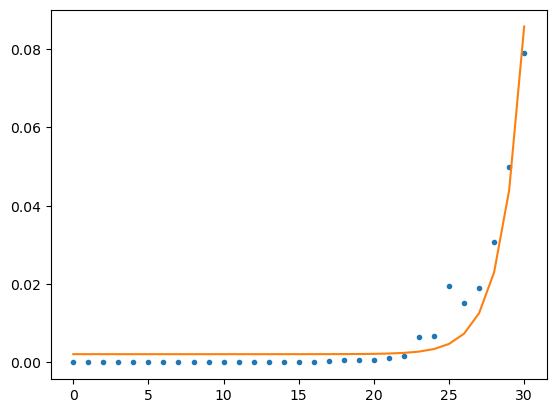

In [13]:
# Adjusting the Data a the logarithm regression
Rexp = [model.intercept_ + model.coef_*(2**n) for n in N]
plt.plot(N,Time,'.')
plt.plot(N,Rexp)

## Recursion in Nested Loops

In some algorithms, recursion may be used within a nested loop
structure, leading to a more complex time complexity analysis. When
recursion and loops combine, it's essential to understand how they
interact to determine the overall time complexity.

Consider the following pseudo-code for an algorithm that involves
recursion within a nested loop:

    function recursiveNestedLoop(n):
        if n <= 0:
            return
        for i in range(n):
            // Some constant-time operations here
        recursiveNestedLoop(n-1)

In this example, the recursive function 'recursiveNestedLoop' is called
with a decreasing value of 'n' inside a loop that iterates from '0' to
'n-1'. The loop performs constant-time operations.

Analyzing the time complexity of such an algorithm can be more
challenging. In this case, the time complexity depends on both the
number of recursive calls and the number of iterations in the loop. If
the loop iterates $n$ times, and the recursion depth is also $n$, the
overall time complexity could be $O(n^2)$.

    Initialize the Sudoku grid
    Initialize a backtracking counter

    Procedure is_valid(x, y, n):
        For j in range(9):
            If grid[x][j] = n:
                Return False

        For i in range(9):
            If grid[i][y] = n:
                Return False

        x0 = 3 * (x // 3)
        y0 = 3 * (y // 3)

        For i in range(3):
            For j in range(3):
                If grid[x0 + i][y0 + j] = n:
                    Return False

        Return True

    Procedure sudoku():
        Global backtracking
        For x in range(9):
            For y in range(9):
                If grid[x][y] = 0:
                    For n in range(1, 10):
                        If is_valid(x, y, n):
                            grid[x][y] = n
                            sudoku()
                            grid[x][y] = 0  # Backtrack
                            backtracking = backtracking + 1

    Call sudoku()
    Print the solved Sudoku grid
    Print the backtracking counter

While the Sudoku puzzle-solving algorithm may encounter a different
number of possibilities for different puzzles, it doesn't depend on the
puzzle's size. This is why its time complexity is often approximated as
O(1) or constant. The efficiency of the algorithm is primarily due to
constraint propagation and the backtracking approach, which help it
solve Sudoku puzzles efficiently.

# Time Complexities in Data Structures

In computer science, understanding the time complexities of data
structure operations is crucial for optimizing algorithms and
applications. Here's an overview of common data structures and their
associated time complexities for fundamental operations.

## Arrays

-   **Access (Get/Set):** $O(1)$ - Constant-time access based on index.

-   **Insertion (at the end):** $O(1)$ on average. However, resizing may
    make it $O(n)$ in the worst case.

-   **Insertion (at the beginning or middle):** $O(n)$ - Shifting
    elements to make room.

-   **Deletion (at the end):** $O(1)$ - Removing the last element.

-   **Deletion (in the middle or beginning):** $O(n)$ - Shifting
    elements to close the gap.

## Linked Lists

-   **Access (Get/Set):** $O(n)$ - Traversing from the head.

-   **Insertion (at the beginning):** $O(1)$ - Adding to the front.

-   **Insertion (at the end):** $O(1)$ with tail pointer, $O(n)$
    without.

-   **Insertion (in the middle):** $O(n)$.

-   **Deletion (at the beginning):** $O(1)$ - Removing the first
    element.

-   **Deletion (at the end):** $O(1)$ with tail pointer, $O(n)$ without.

## Stacks and Queues

-   **Push (for stacks):** $O(1)$ - Adding to the top.

-   **Pop (for stacks):** $O(1)$ - Removing from the top.

-   **Enqueue (for queues):** $O(1)$ - Adding to the rear.

-   **Dequeue (for queues):** $O(1)$ - Removing from the front.


# Balanced Binary Search Tree (BST)

A **Binary Search Tree (BST)** is a hierarchical data structure used for
efficient data storage and retrieval. A *balanced* BST is a specific
type of BST where the tree is structured in a way that ensures
relatively equal heights of the left and right subtrees, leading to
improved search and insertion performance.

## Key Characteristics

-   **Binary Search Tree (BST):**

    -   A BST is a tree-based data structure where each node has at most
        two child nodes, often referred to as the "lef" and "right"
        children.

    -   The nodes in a BST are organized in such a way that for any
        given node:

        -   All nodes in its left subtree have values less than or equal
            to the node's value.

        -   All nodes in its right subtree have values greater than the
            node's value.

    -   This property ensures that data can be efficiently searched,
        inserted, and deleted.

-   **Balanced BST:**

    -   A balanced BST is a specific type of BST in which the height of
        the tree is approximately balanced, meaning that the difference
        in height between the left and right subtrees of any node is
        limited.

    -   A balanced BST minimizes the height of the tree, which in turn
        ensures that key operations like search, insertion, and deletion
        have time complexities close to their best-case scenarios.

## Benefits of Balanced BSTs

Balanced BSTs offer several benefits:

-   **Efficient Search:** In a balanced BST, the height of the tree is
    logarithmic in the number of nodes, resulting in efficient search
    operations with a time complexity of $O(\log n)$, where $n$ is the
    number of nodes.

-   **Efficient Insertion and Deletion:** Balanced BSTs maintain their
    balanced structure during insertions and deletions. As a result,
    these operations also have time complexities of $O(\log n)$ on
    average.

-   **Ordered Traversal:** In-order traversal of a balanced BST produces
    elements in sorted order, making it easy to obtain elements in
    ascending or descending order.

-   **Self-Balancing Mechanisms:** Some balanced BSTs, like AVL trees
    and Red-Black trees, have self-balancing mechanisms that
    automatically adjust the tree's structure after insertions and
    deletions to maintain balance.

## Common Balanced BST Variants

-   **AVL Tree:** An AVL tree is a self-balancing binary search tree
    where the height difference between the left and right subtrees of
    any node (the "balance factor\") is limited to at most 1. This
    ensures a balanced structure and guarantees $O(\log n)$ time
    complexity for search, insertion, and deletion.

-   **Red-Black Tree:** A Red-Black tree is another self-balancing BST
    with a set of rules that maintain balance. It ensures that the
    longest path from the root to any leaf node is no more than twice
    the length of the shortest path. Red-Black trees also provide
    $O(\log n)$ time complexity for common operations.

Balanced Binary Search Trees are widely used in computer science and are
the foundation for many efficient data storage and retrieval algorithms.
Their ability to maintain a balanced structure ensures predictable and
efficient performance, even as data is dynamically inserted and removed
from the tree.

<figure>

<figcaption>Balanced Binary Search Tree</figcaption>
</figure>

The figure above represents a balanced Binary Search Tree (BST). In this
example:

\- The root node contains the value 15. - Nodes are organized such that
values less than the parent node are on the left, and values greater
than the parent node are on the right. - The tree maintains a balanced
structure, with approximately equal heights of the left and right
subtrees, ensuring efficient search, insertion, and deletion operations.

This balanced BST serves as an example of how data can be organized in a
hierarchical structure for efficient retrieval and manipulation.

-   **Insertion:** $O(\log(n))$ - Inserting into a balanced binary
    search tree.

-   **Access (Search):** $O(\log(n))$ - Searching in a balanced binary
    search tree.

-   **Deletion:** $O(\log(n))$ - Deleting from a balanced binary search
    tree.